<a href="https://colab.research.google.com/github/Priya29satya07/miniproject_1/blob/main/miniproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas sklearn xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=9f0d8b467f40bf6da9b9bcd4258f834241306859cd734ebf6797ffca6724016a
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn import metrics # for calculation of accuracy and precision
from sklearn.metrics import confusion_matrix #performance measures
from sklearn import svm 
import seaborn as sns#for visualization
from matplotlib import pyplot
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve# to calculate performance of model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [3]:
#DataFlair - Read the data
df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#DataFlair - Get the features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [5]:
#DataFlair - Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])


147 48


In [6]:
#DataFlair - Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [7]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [8]:
clf = svm.SVC(kernel='poly',degree=2) 
#declaring a variable to svm model

In [9]:
clf.fit(x_train, y_train)#fitting data set into svm model


SVC(degree=2, kernel='poly')

In [10]:
def report(model): #Function to calculate classification report,confusion matrix & roc curve
    preds = model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test)
    plot_roc_curve(model,x_test,y_test)

SVM Classifier
              precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       1.00      0.86      0.93        37

    accuracy                           0.87        39
   macro avg       0.64      0.93      0.69        39
weighted avg       0.96      0.87      0.90        39



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


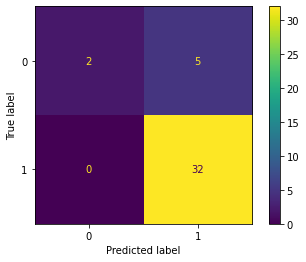

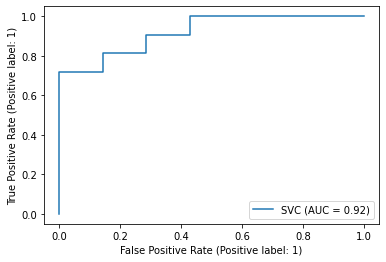

In [11]:
print("SVM Classifier")
report(clf)

In [12]:
#fittting the training set into model
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


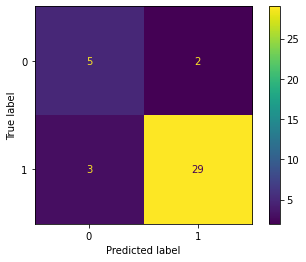

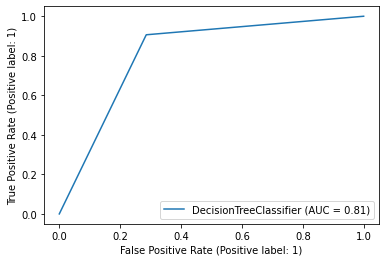

In [13]:
print("Decision Tree Classifier")
report(tree)

In [14]:
#fitting our nodel with training sets
ran=RandomForestClassifier(n_estimators=100)
ran.fit(x_train,y_train)

RandomForestClassifier()

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.97      0.91      0.94        34

    accuracy                           0.90        39
   macro avg       0.77      0.86      0.80        39
weighted avg       0.92      0.90      0.90        39



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


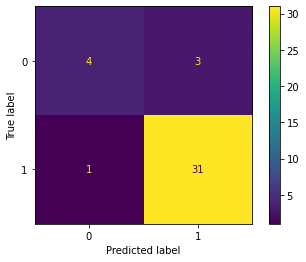

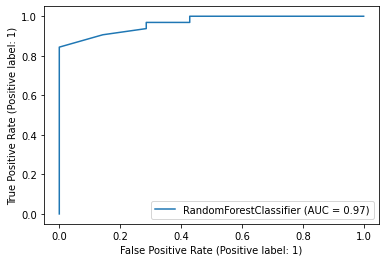

In [15]:
print("Random Forest Classifier")
report(ran)

In [16]:
#now building  adaboostclassifier on training sets and fitting 
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100
)
classifier.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

Adaboost
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.94      0.97      0.95        31

    accuracy                           0.92        39
   macro avg       0.90      0.86      0.88        39
weighted avg       0.92      0.92      0.92        39



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


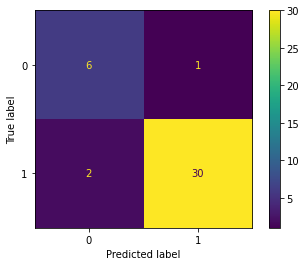

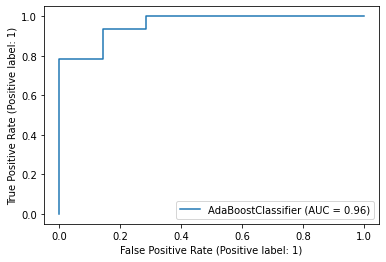

In [17]:
print("Adaboost")
report(classifier)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=50)

KNN
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90        39

    accuracy                           0.82        39
   macro avg       0.50      0.41      0.45        39
weighted avg       1.00      0.82      0.90        39



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

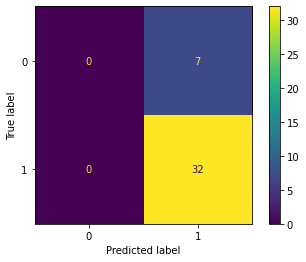

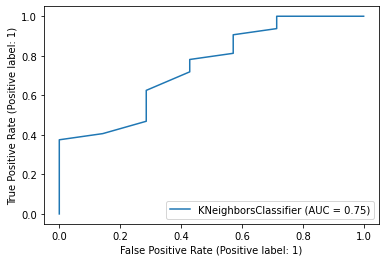

In [19]:
print("KNN")
knc.fit(x_train,y_train)
report(knc)

In [20]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

Logistic Regression
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.94      0.91      0.92        33

    accuracy                           0.87        39
   macro avg       0.75      0.79      0.77        39
weighted avg       0.88      0.87      0.88        39



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


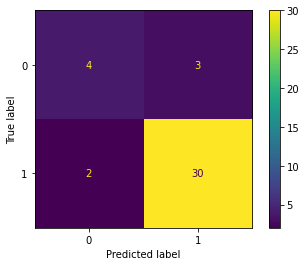

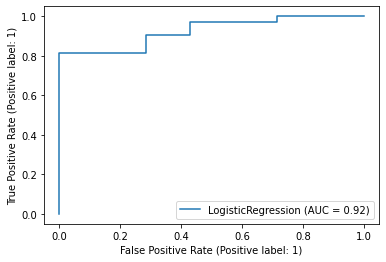

In [21]:
print("Logistic Regression")
report(lrc)

In [22]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50)
bc.fit(x_train,y_train)

BaggingClassifier(n_estimators=50)

bagging
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.97      0.91      0.94        34

    accuracy                           0.90        39
   macro avg       0.77      0.86      0.80        39
weighted avg       0.92      0.90      0.90        39



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


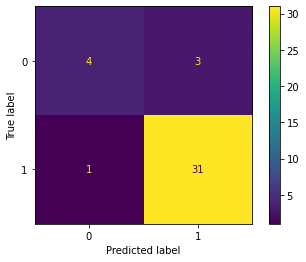

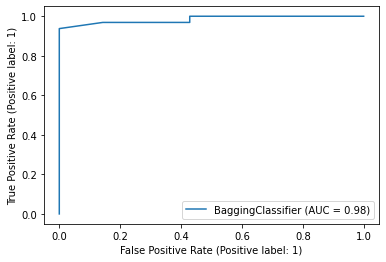

In [23]:
print("bagging")
report(bc)

In [24]:
#DataFlair - Train the model
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier()

XGB Classifier
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.94      0.97        34

    accuracy                           0.95        39
   macro avg       0.86      0.97      0.90        39
weighted avg       0.96      0.95      0.95        39



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


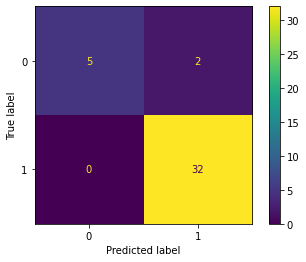

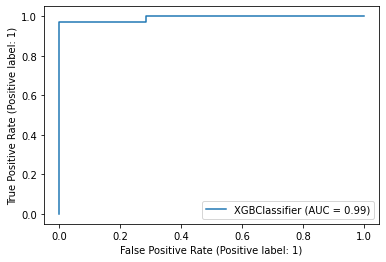

In [25]:
print("XGB Classifier")
report(model)